📝 Project: Classification on Advertisement Click Dataset

In this project, we work with a real-world dataset related to online advertisement engagement. The dataset contains user information such as daily time spent on the site, age, area income, internet usage, ad topic, city, gender, country, and timestamp of interaction. The target variable is "Clicked on Ad", which indicates whether a user clicked on the advertisement or not.

Our goal is to build a complete machine learning pipeline—from data exploration and preprocessing to model development and evaluation—to classify whether a user is likely to click on an online advertisement.

🎯 Objective

The primary objective is to build and compare the performance of multiple machine learning models to accurately predict ad click behavior (Clicked on Ad). This classification can help marketing teams and digital platforms improve targeting strategies, optimize ad placements, and boost conversion rates.

The models evaluated include:

- Logistic Regression

- Naive Bayes

- Decision Tree

- Random Forest

- AdaBoost

- XGBoost

- ANN

📊 Evaluation Metrics

We assess the performance of each model using the following metrics:

- Accuracy

- Precision

- Recall

- F1 Score

- Confusion Matrix

Outcome

By comparing model performance across these metrics, we aim to select the most effective classifier for predicting ad click behavior. The insights gained from this project can help businesses enhance customer segmentation, increase ad campaign efficiency, and make data-driven marketing decisions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S4/Classification/ctr/ad_10000records.csv")

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [5]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

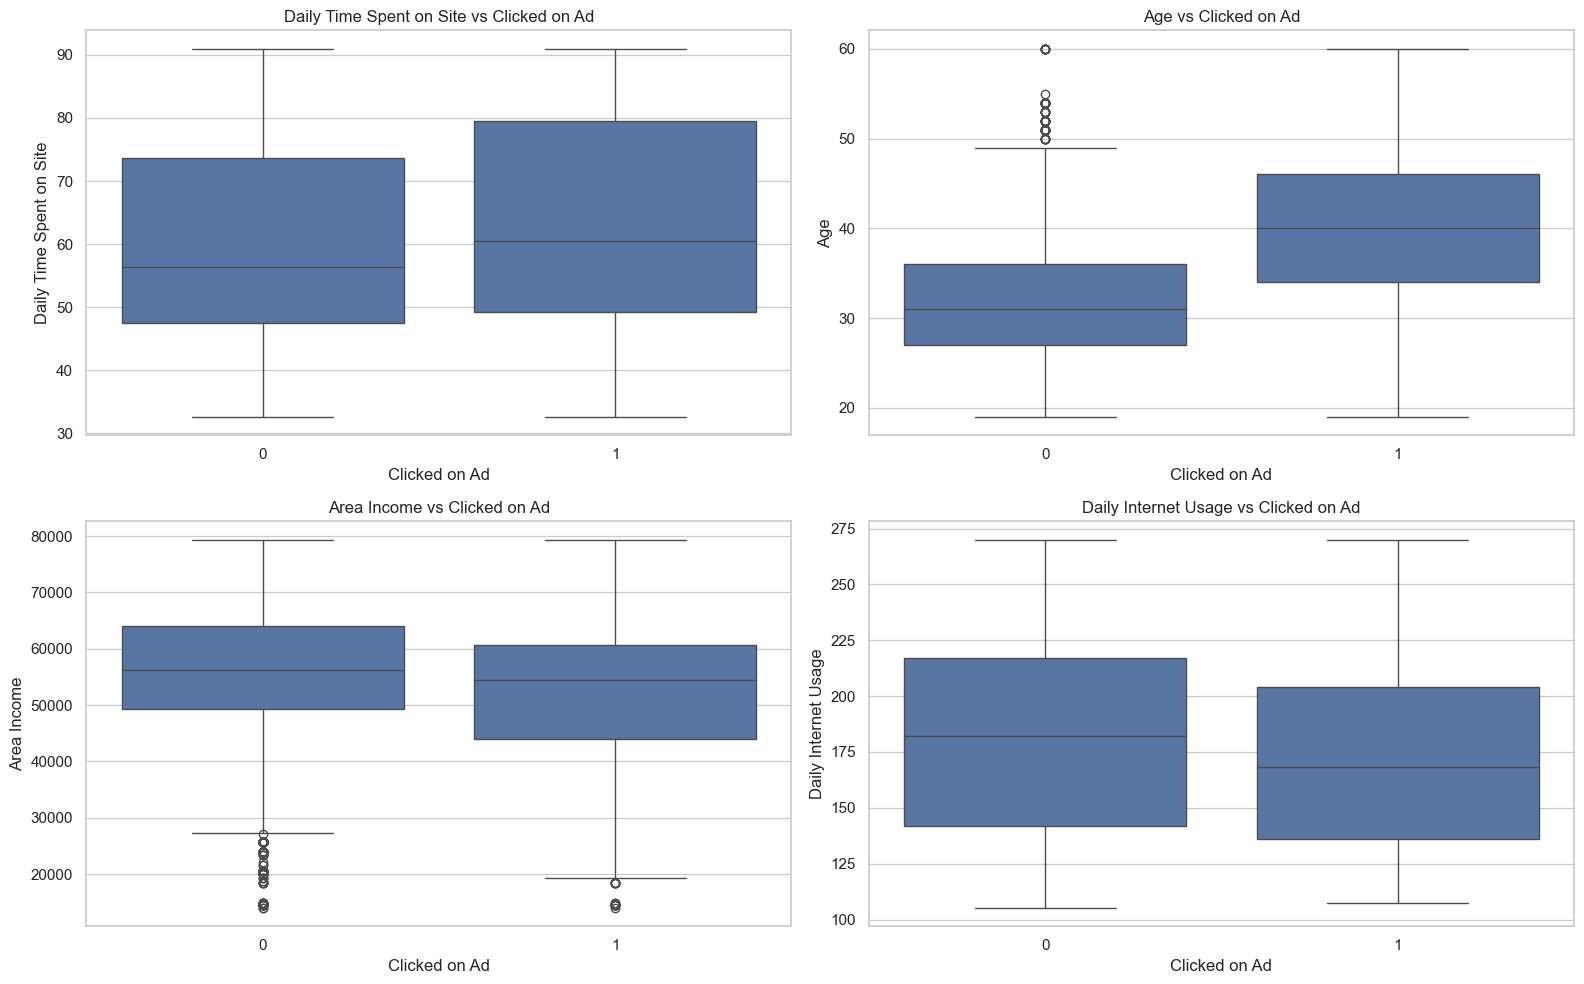

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create box plots comparing numerical features with the target variable
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Boxplot: Daily Time Spent on Site vs Clicked on Ad
sns.boxplot(data=data, x='Clicked on Ad', y='Daily Time Spent on Site', ax=axs[0, 0])
axs[0, 0].set_title('Daily Time Spent on Site vs Clicked on Ad')

# Boxplot: Age vs Clicked on Ad
sns.boxplot(data=data, x='Clicked on Ad', y='Age', ax=axs[0, 1])
axs[0, 1].set_title('Age vs Clicked on Ad')

# Boxplot: Area Income vs Clicked on Ad
sns.boxplot(data=data, x='Clicked on Ad', y='Area Income', ax=axs[1, 0])
axs[1, 0].set_title('Area Income vs Clicked on Ad')

# Boxplot: Daily Internet Usage vs Clicked on Ad
sns.boxplot(data=data, x='Clicked on Ad', y='Daily Internet Usage', ax=axs[1, 1])
axs[1, 1].set_title('Daily Internet Usage vs Clicked on Ad')

plt.tight_layout()
plt.show()


1. Daily Time Spent on Site vs Clicked on Ad
   Users who did not click on ads (0) tend to spend more time on the site.
   Users who clicked on ads (1) tend to spend less time.

2. Age vs Clicked on Ad
   Users who clicked on ads (1) tend to be older.
   Non-clickers (0) tend to be younger.

3. Area Income vs Clicked on Ad
   Users from lower-income areas are more likely to click on ads.
   Higher income users mostly fall in the non-clicker category.

4. Daily Internet Usage vs Clicked on Ad
   Clickers (1) generally have lower internet usage.
   Non-clickers (0) use the internet more heavily on a daily basis.

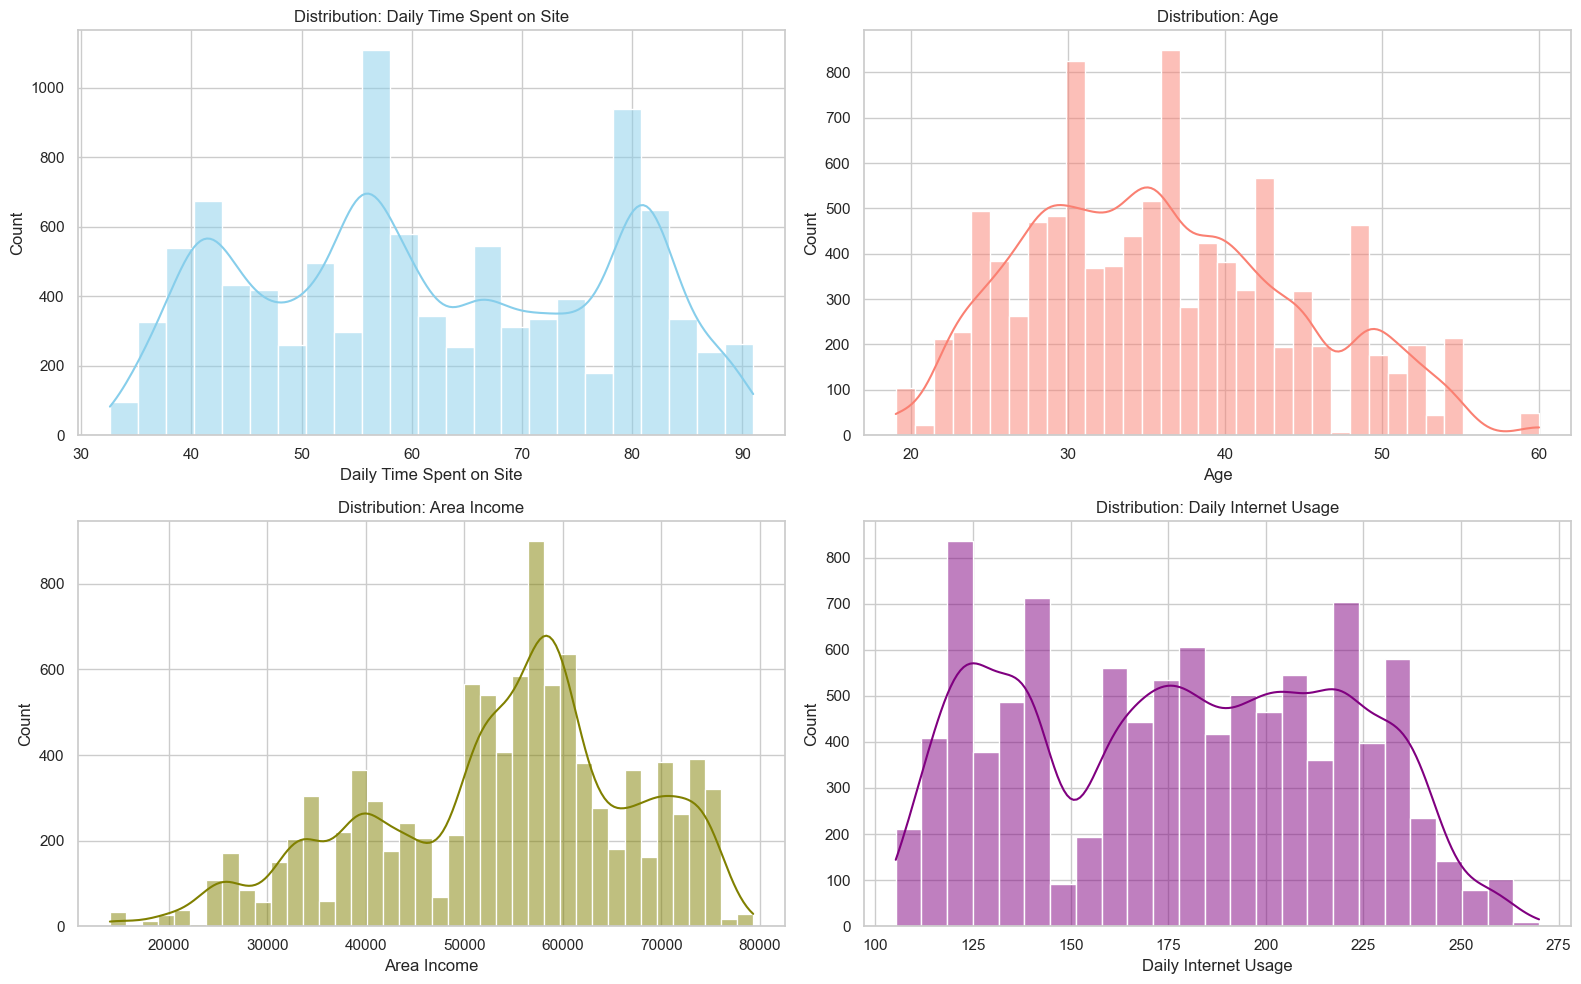

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots for the distribution plots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Distribution: Daily Time Spent on Site
sns.histplot(data['Daily Time Spent on Site'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution: Daily Time Spent on Site')

# Distribution: Age
sns.histplot(data['Age'], kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Distribution: Age')

# Distribution: Area Income
sns.histplot(data['Area Income'], kde=True, ax=axs[1, 0], color='olive')
axs[1, 0].set_title('Distribution: Area Income')

# Distribution: Daily Internet Usage
sns.histplot(data['Daily Internet Usage'], kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Distribution: Daily Internet Usage')

# Adjust layout
plt.tight_layout()
plt.show()


📊 1. Daily Time Spent on Site
Distribution Shape: Slightly left-skewed (most users spend moderate to high time).
Common Range: Majority of users spend 50 to 75 minutes/day on the site.
Outliers: A few users spend more than 85 minutes, which might be highly engaged users.

2. Age
Distribution Shape: Slightly right-skewed.
Common Range: Most users are between 25 and 45 years old, peaking near 30–35.
Outliers: Very few users above 55.

3. Area Income
Distribution Shape: Almost normal.
Common Range: Most area incomes lie between ₹40,000 and ₹65,000.
Outliers: Some users live in areas earning above ₹75,000 or below ₹20,000.

4. Daily Internet Usage
Distribution Shape: Bell-shaped (normal-like).
Common Range: Peaks between 170 and 210 minutes/day


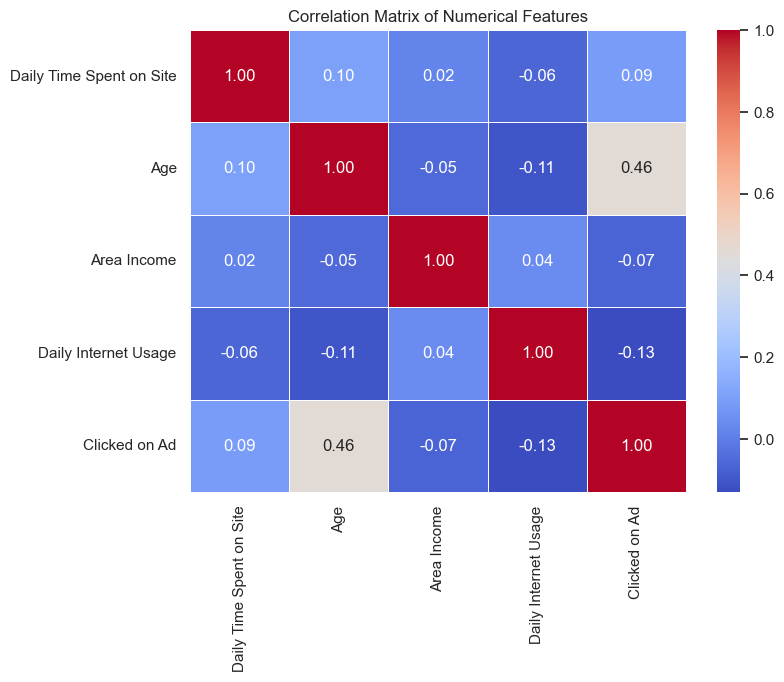

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix for numerical features
corr_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


1. Strong Positive Correlation: Age and Clicked on Ad
- The correlation coefficient between "Age" and "Clicked on Ad" is 0.46, indicating a moderate to strong positive relationship.
- This suggests that as age increases, the likelihood of clicking on an ad also tends to increase.

#### 2. Weak Correlations
- Most other correlations are weak, with coefficients close to 0.
- For example, "Time Spent on Site" has weak correlations with all other features, indicating that time spent on the site does not strongly influence or is not strongly influenced by other factors.

#### 3. Negative Correlations
- "Internet Usage" has a negative correlation with "Clicked on Ad" (-0.13), suggesting that higher internet usage might slightly decrease the likelihood of clicking on ads.
- "Area Income" has a negative correlation with "Clicked on Ad" (-0.07), indicating that higher area income might slightly decrease the likelihood of clicking on ads.

#### 4. No Multicollinearity Issues
- There are no extremely high correlations (close to 1 or -1) between any two features, suggesting that multicollinearity is not a significant issue in this dataset.

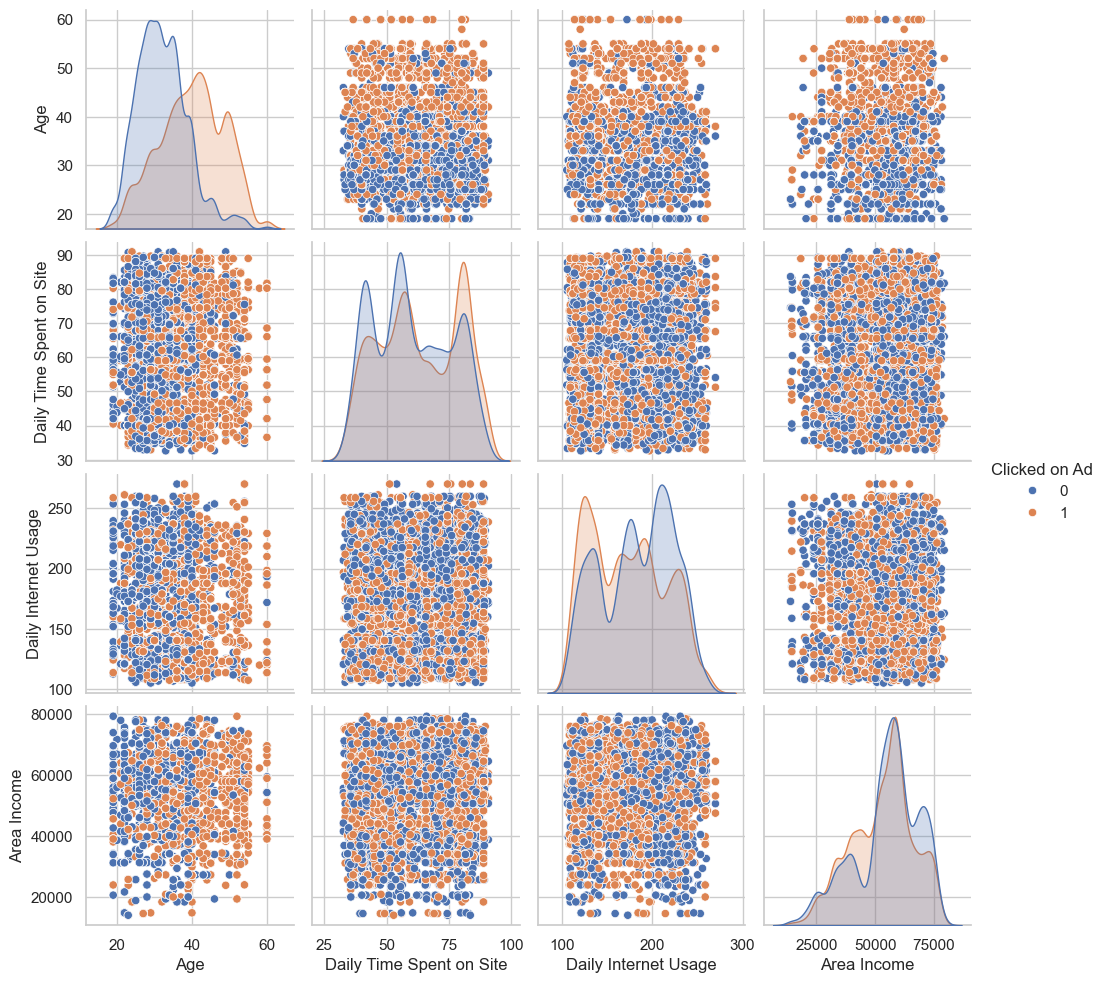

In [9]:
sns.pairplot(data[['Age', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income', 'Clicked on Ad']], hue='Clicked on Ad')
plt.show()


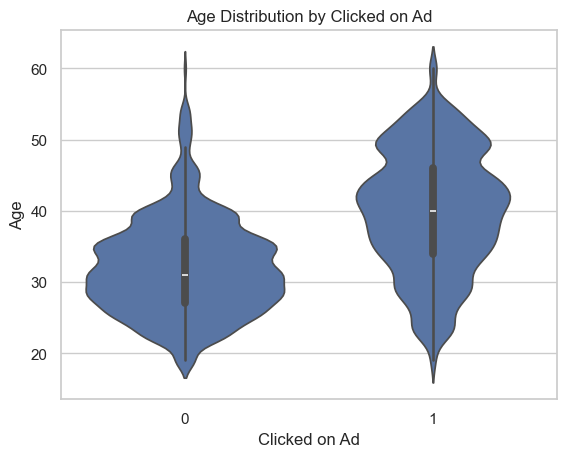

In [10]:
sns.violinplot(x='Clicked on Ad', y='Age', data=data)
plt.title('Age Distribution by Clicked on Ad')
plt.show()


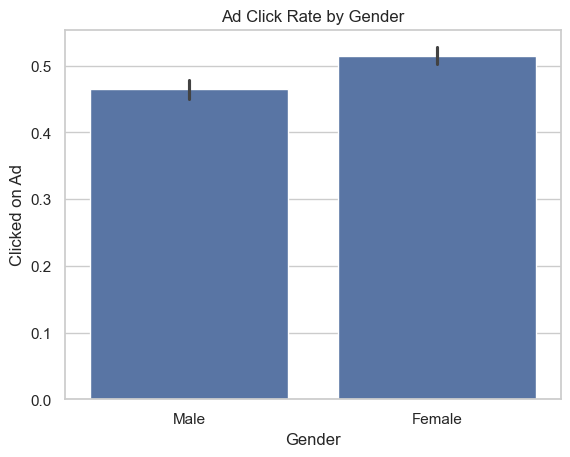

In [11]:
sns.barplot(x='Gender', y='Clicked on Ad', data=data)
plt.title('Ad Click Rate by Gender')
plt.show()


- Females have a slightly higher as click rate compared to males.
- The difference in ad click rates between males and females is relatively small, indicating that both genders have similar click-through behaviors.

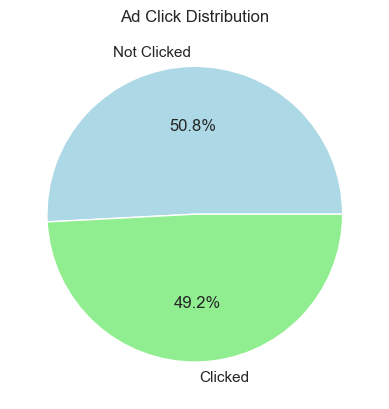

In [12]:
data['Clicked on Ad'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Clicked', 'Clicked'], colors=['lightblue', 'lightgreen'])
plt.title('Ad Click Distribution')
plt.ylabel('')
plt.show()

Based on the data presented in the pie chart, the ad click-through rate is relatively balanced between clicked and not clicked ads.

In [13]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'Gender'
data['Gender'] = le.fit_transform(data['Gender'])  # Female = 0, Male = 1

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)  # limit to top 100 words
ad_topic_tfidf = tfidf.fit_transform(data['Ad Topic Line']).toarray()

# Add these features to your main DataFrame
ad_topic_df = pd.DataFrame(ad_topic_tfidf, columns=tfidf.get_feature_names_out())
data = pd.concat([data, ad_topic_df], axis=1)

# Now drop the original text column
data.drop('Ad Topic Line', axis=1, inplace=True)


In [16]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data.drop('Timestamp', axis=1, inplace=True)

In [17]:
data.drop('City', axis=1, inplace=True)

In [18]:
# Step 1: Get top 10 countries
top_countries = data['Country'].value_counts().nlargest(10).index

# Step 2: Replace all other countries with 'Other'
data['Country'] = data['Country'].apply(lambda x: x if x in top_countries else 'Other')

# Step 3: One-hot encode Country into 0/1 columns
data = pd.get_dummies(data, columns=['Country'], drop_first=False)
data = data.astype(int)


In [19]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,5thgeneration,access,analyzer,attitude,...,Country_Australia,Country_Bangladesh,Country_Bolivia,Country_Burundi,Country_Czech Republic,Country_Hong Kong,Country_Other,Country_Qatar,Country_Turkey,Country_Vanuatu
0,62,32,69481,172,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,41,31,61840,207,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,30,57877,172,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,59,28,56180,207,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,49,30,54324,201,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41,31,61840,207,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9996,41,28,51501,120,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9997,55,39,38067,124,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,46,50,43974,123,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler

# X = all features except the target
X = data.drop('Clicked on Ad', axis=1)

# y = target
y = data['Clicked on Ad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[830 184]
 [289 697]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1014
           1       0.79      0.71      0.75       986

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



# KNN

✅ Confusion Matrix:
 [[821 193]
 [231 755]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1014
           1       0.80      0.77      0.78       986

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000


✅ Accuracy Score: 0.788


/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


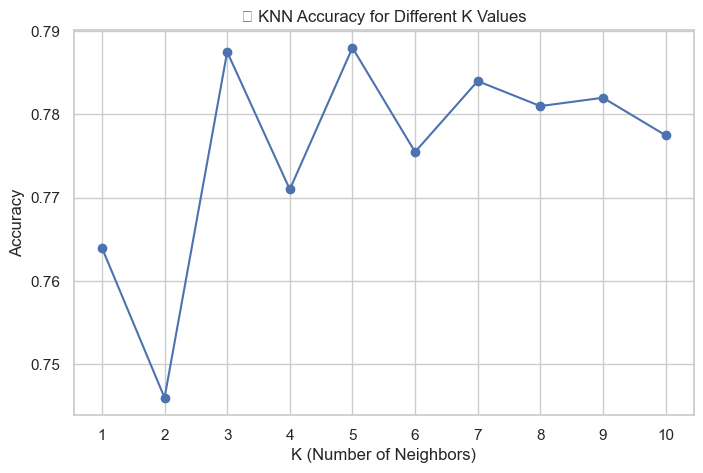

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Train KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 3. Predict and evaluate
y_pred = knn.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 4. Try multiple k values and plot accuracy
accuracy = []
k_range = range(1, 11)

for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    preds = knn_k.predict(X_test)
    accuracy.append(accuracy_score(y_test, preds))

plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracy, marker='o', linestyle='-', color='b')
plt.title('🔍 KNN Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()


# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))


✅ Confusion Matrix:
 [[984  30]
 [778 208]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.97      0.71      1014
           1       0.87      0.21      0.34       986

    accuracy                           0.60      2000
   macro avg       0.72      0.59      0.52      2000
weighted avg       0.71      0.60      0.53      2000


✅ Accuracy Score: 0.596


# SVM 

In [26]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')  # You can try 'linear', 'poly', or 'rbf'
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))


✅ Confusion Matrix:
 [[828 186]
 [291 695]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78      1014
           1       0.79      0.70      0.74       986

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000


✅ Accuracy Score: 0.7615


<h1>Decision Tree</h1>

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))


✅ Confusion Matrix:
 [[793 221]
 [237 749]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      1014
           1       0.77      0.76      0.77       986

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000


✅ Accuracy Score: 0.771


<h1>Random Forest</h1>

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))


✅ Confusion Matrix:
 [[873 141]
 [167 819]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1014
           1       0.85      0.83      0.84       986

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


✅ Accuracy Score: 0.846


<h1>Adaboost</h1>

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))


✅ Confusion Matrix:
 [[837 177]
 [305 681]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78      1014
           1       0.79      0.69      0.74       986

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000


✅ Accuracy Score: 0.759


<h1>XGBoost</h1>

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))


✅ Confusion Matrix:
 [[881 133]
 [148 838]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1014
           1       0.86      0.85      0.86       986

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


✅ Accuracy Score: 0.8595


/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:33:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<h1>ANN</h1>

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# 2. Compile the model (backprop handled automatically)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# 4. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("\n✅ Accuracy on Test Set:", accuracy)

# 5. Predict and threshold
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# 6. Metrics
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-19 18:34:48.500088: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-06-19 18:34:48.500266: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-06-19 18:34:48.500272: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1750338288.500671  114740 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1750338288.500848  114740 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB m

Epoch 1/30


2025-06-19 18:34:49.078026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6801 - loss: 0.6802 - val_accuracy: 0.7788 - val_loss: 0.5206
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7579 - loss: 0.5128 - val_accuracy: 0.7638 - val_loss: 0.5174
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7455 - loss: 0.5197 - val_accuracy: 0.7613 - val_loss: 0.5113
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7476 - loss: 0.5087 - val_accuracy: 0.7650 - val_loss: 0.5043
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7453 - loss: 0.5186 - val_accuracy: 0.7550 - val_loss: 0.5152
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7486 - loss: 0.5040 - val_accuracy: 0.7675 - val_loss: 0.5019
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7437 - loss: 0.5239 - val_accuracy: 0.7287 - val_loss: 0.5320
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7338 - loss: 0.5235 - val_accuracy: 0.7550 - val_

In [33]:
# Replace these with your actual accuracy scores
model_names = ['Logistic Regression','KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 
               'Random Forest', 'AdaBoost', 'XGBoost', 'ANN']

accuracy_scores = [0.76, 0.79, 0.60, 0.76, 0.77, 0.85, 0.76, 0.86,0.62]  # Example values


/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_2106/551865704.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


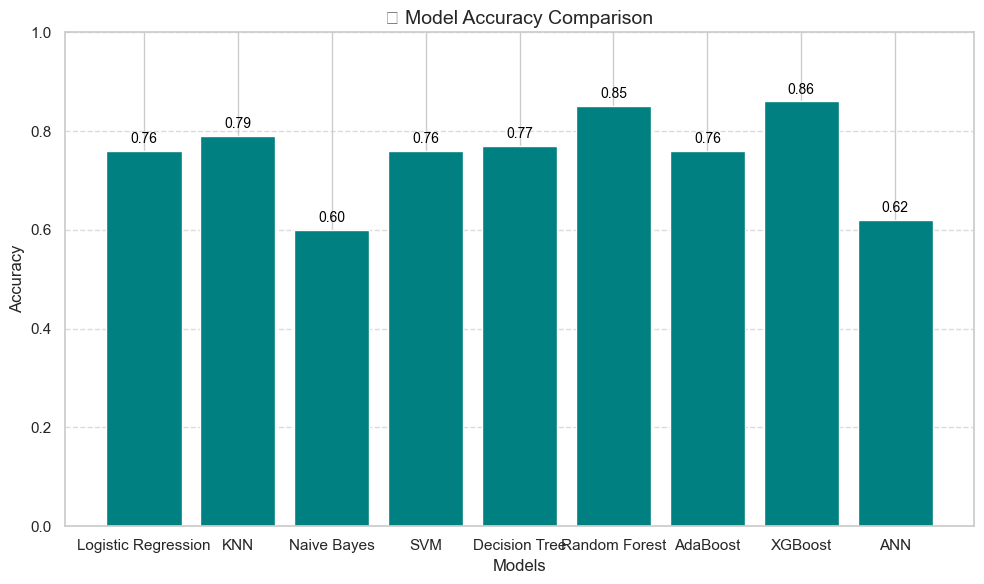

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color='teal')

# Annotate each bar with accuracy value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0, 1)
plt.title("📊 Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- XGBoost highest accuracy among all models.Likely the best model for this classification problem
- Random Forest very close to XGBoost, indicating ensemble tree methods works well for this dataset.
- KNN performs decently; simple and effective